# Mock Lecture: Hypothesis Testing / Bayes' Theorem

## Motivating Example

Consider the following scenario: 

Maia just accepted a new job offer, but she really hates commuting.  A lot.  She appreciates that her commute time will fluctuate from day to day based on weather, traffic, and other random factors, but she is absolute in her refusal to continue working at any job for which her average commute time is greater than 30 minutes.  

In the given scenario, the main hypothesis Maia will wish to test is whether, after having gone to work for some number of days and observing her commute times on each day, her expected commute time is greater than 30 minutes

## Necessary Components of a Hypothesis Test

Every hypothesis test relies on three parts:  

1. A model
1. A null hypothesis 
1. An alternative hypothesis 

### Part 1: A Model

Before we can even posit a hypothesis to test, we first need to specify a *model*.  At the most basic level, a model consists of a set of assumptions about how the data we will use to test our hypotheses were generated and, in particular, makes some specific statements about the form(s) of randomness that appear in these data.  A very simple model that we could posit in our current example is that Maia's commute time each day is an identically and independently distributed (i.i.d) Gaussian random variable 

$X \overset{i.i.d.}{\sim}N(\mu,\sigma^2)$ 

In the analysis that follows, it will be useful to write $X$ in mean-error form 

$X = \mu + \varepsilon$, 

where $ \varepsilon \overset{i.i.d.}{\sim} N(0,\sigma^2)$ 



### Part 2: A null hypothesis

The second necessary component Maia needs to conduct her test is a *null hypothesis*.  A null hypothesis is a restriction of one or more of the parameters of the model.  

Our current model, $X \overset{i.i.d.}{\sim}N(\mu,\sigma^2)$, has two parameters: $\mu$, the expected commute time and $\sigma^2$, the population variance of commute time.  

For Maia's problem, the appropriate null hypothesis for her to use is 

$H_0: \mu = 30$.  

You might have two questions in your head at this point:

1. Why did Maia choose $\mu = 30$ as her null hypothesis rather than $\mu=25$ or $\mu=35$?
1. Why does Maia's null hypothesis restrict $\mu$ but not $\sigma^2$?

We'll return to these questions later.  

### Part 3: An alternative hypothesis

The final necessary component Maia needs is an *alternative hypothesis*.  The alternative hypothesis describes what Maia actually hopes to learn from conducting her test.  Since she's conducting this test to determine whether she should stay at her current workplace, the appropriate alternative hypothesis for her to test is 

$H_a$: $\mu > 30$  

## What is a hypothesis test?

After commuting to work for some number $n$ days, Maia has accumulated a sample of commute times $\{x_i\}_{i=1}^{n}$ that she can use to conduct a *hypothesis test*.  

One can think of a hypothesis test as an answer to the following hypothetical question:

If the null hypothesis $H_0$ were true, what is the probability that, if I drew another sample equal in size to the one I have, it would look at least as odd (in a sense that will vary based on context) as the sample I have?  



In Maia's scenario, we want to estimate the probability that, if Maia's model and null hypothesis are both correct, that her mean commuting time over the *next* $n$ days will be at least as large as it was over the first $n$ days.  

* If this probability is very small, there is a high likelihood that either the null hypothesis or the model is wrong and Maia should quit (Maia rejects the null hypothesis).
* If this probability is not very small, Maia cannot say with great certainty that her expected commute time is greater than 30 minutes (Maia fails to reject the null hypothesis).  



##  Deriving an appropriate test (Part I) 


Her model determines the appropriate test she should use.  Since she's trying to learn about her true (population) mean commute time, $\mu$, a natural starting point for deriving a test statistic is to look at the mean commute time in her sample: 

$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$

Under the model, the distribution of $\bar{x}$ can be derived as

$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$

$\bar{x}= \frac{1}{n}\sum_{i=1}^{n} \mu + \varepsilon_i$ 

$\bar{x} - \mu  = \frac{1}{n}\sum_{i=1}^{n} \varepsilon_i$ 

Since each $\varepsilon_i \overset{i.i.d.}{\sim} N(0,\sigma^2)$, the distribution of the entire summation term in the above expression a Gaussian random variable with distribution 

$\sum_{i=1}^{n} \varepsilon_i \sim N(0, n \sigma^2)$

which implies that 

$ \frac{\sqrt{n}(\bar{x} - \mu)}{\sigma} \sim N(0,1)$ 

If Maia's null hypothesis made assumptions about both $\mu$ and $\sigma^2$, the above expression would allow us to compute the probability of observing a mean at least as large as her sample mean.  Otherwise, we need to keep working.


##  Deriving an appropriate test (Part II) 

Since our null hypothesis doesn't specify the value of $sigma^2$ to use in our test, Maia needs to use her sample to estimate it and factor in the additional uncertainty that results from not knowing it into her testing procedure.  The following results facilitate this

1. $s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$ is an unbiased estimator of $\sigma^2$  <a href="#proof1">Proof</a>

1. $\frac{s^2}{(n-1)\sigma^2}\sim \chi^2(n-1)$ <a href="#proof2">Proof</a>
    
1. $\frac{s^2}{\sigma^2}$ and $\bar{x} - \mu$ are independent <a href="#proof2">Proof</a>

Based on these results, $\frac{\sqrt{n}(\bar{x}-\mu)}{s}$ is t-distributed with $n-1$ degrees of freedom.  

## Choosing a critical value

With a test statistic and a sample in hand, Maia can now compute the probability (under the null) of drawing a sample with size $n$ that has a mean at least as large as that of her sample.  The last thing she needs to decide is the *critical value* of the test statistic, which defines the threshold level of the test statistic at which the null hypothesis should be rejected.  We typically set our critical value such that the probability density on the extreme side of the test statistic distibution is equal to a particular level, which defines the *significance level* of the test.  

This is illustrated in the following code, which graphs a t-distribution, a selected significance level, and its associated critical value.  

Critical value = 1.725


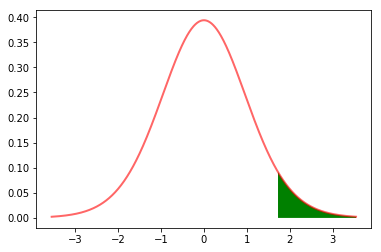

In [7]:
from scipy.stats import t 
import matplotlib.pyplot as plt 
import numpy as np 

df=20
siglev = 0.05
cv = t.ppf(1-siglev,df)
tgrid = np.arange(t.ppf(0.001,df),t.ppf(0.999,df),0.01)

fig, ax = plt.subplots(1,1)
ax.plot(tgrid, t.pdf(tgrid, df),'r-', lw=2, alpha=0.6, label='t pdf')


print("Critical value = %5.3f" % cv)
tgridcrit = tgrid[tgrid>cv]
ax.fill_between(tgridcrit, 0, t.pdf(tgridcrit,df), facecolor='green', interpolate=True)


### Factors to Consider in Determining Significance Level


* The significance level determines how often Maia will accidentally reject a true null (Type 1 Error)
* Setting the significance level (critical value) too low (high) risks failing to reject a false null hypothesis (Type 2 Error)  

Let's consider two scenarios: 

1. Maia's true mean commute time is $\mu=29$ with variance $\sigma^2=32$ and she collects data on her commute $n=20$ days.  

2. Maia's true mean commute time is $\mu=31$ with variance $\sigma^2=32$ and she collects data on her commute $n=20$ days.

Let's simulate each of these scenarios a bunch of times and see how different decision rules work out


In [2]:
from IPython.display import HTML, display
import tabulate
from scipy.stats import norm 
nsim = 5000 
mu1 = 29
mu2 = 31 
mutest = 30
s2 = 32 
n=20
df=n-1 

# Let's define the t-test: stats.norm has an appropriate test we can use, but we'll do it manually here for the sake
# of illustration 
def ttest(sample,siglev,mut):
    xbar = np.mean(sample)
    dfsamp = len(sample)-1
    sest = np.sqrt(np.var(sample-xbar,ddof=1))
    tstat = np.sqrt(len(sample))*(xbar - mut)/sest
    tsig = 1-t.cdf(tstat,dfsamp)
    rejectnull = (tsig<siglev) 
    return(rejectnull)
    
# Let's create our simulated data samples 
np.random.seed(17)
samp1 = norm.rvs(loc=mu1,scale=np.sqrt(s2),size=(n,nsim))
samp2 = norm.rvs(loc=mu2,scale=np.sqrt(s2),size=(n,nsim))

# For each test, let's run a level at 5%, 2.5%, and 1% significance 
# In each case, we'll count how many times the test rejects the null hypothesis 
res1s5 = [ttest(samp1[...,x],siglev=0.05,mut=mutest) for x in range(nsim)]
res1s25 = [ttest(samp1[...,x],siglev=0.025,mut=mutest) for x in range(nsim)]
res1s1 = [ttest(samp1[...,x],siglev=0.01,mut=mutest) for x in range(nsim)]    

res2s5 = [ttest(samp2[...,x],siglev=0.05,mut=mutest) for x in range(nsim)]
res2s25 = [ttest(samp2[...,x],siglev=0.025,mut=mutest) for x in range(nsim)]
res2s1 = [ttest(samp2[...,x],siglev=0.01,mut=mutest) for x in range(nsim)] 


def nreject(results):
    return(len([x for x in results if x]))

def nnoreject(results):
    return(len([x for x in results if not x]))


print("Test results \n")
print("mu=%5.2f, siglev=%5.3f || Do not reject=%d, Reject=%d " % (mu1,0.05,nnoreject(res1s5),nreject(res1s5)))
print("mu=%5.2f, siglev=%5.3f || Do not reject=%d, Reject=%d " % (mu1,0.025,nnoreject(res1s25),nreject(res1s25)))
print("mu=%5.2f, siglev=%5.3f || Do not reject=%d, Reject=%d " % (mu1,0.01,nnoreject(res1s1),nreject(res1s1)))

print("mu=%5.2f, siglev=%5.3f || Do not reject=%d, Reject=%d " % (mu2,0.05,nnoreject(res2s5),nreject(res2s5)))
print("mu=%5.2f, siglev=%5.3f || Do not reject=%d, Reject=%d " % (mu2,0.025,nnoreject(res2s25),nreject(res2s25)))
print("mu=%5.2f, siglev=%5.3f || Do not reject=%d, Reject=%d " % (mu2,0.01,nnoreject(res2s1),nreject(res2s1)))
print("\n**************************\n")
    
print("Precision vs. Recall \n")
print("siglev = %5.3f || Recall = %5.3f, Precision = %5.3f" % (0.05, 
                                                               nreject(res2s5)/(nreject(res2s5) + nreject(res1s5)),
                                                               nreject(res2s5)/(nreject(res2s5) + nnoreject(res2s5))))

print("siglev = %5.3f || Recall = %5.3f, Precision = %5.3f" % (0.025, 
                                                               nreject(res2s25)/(nreject(res2s25) + nreject(res1s25)),
                                                               nreject(res2s25)/(nreject(res2s25) + nnoreject(res2s25))))


print("siglev = %5.3f || Recall = %5.3f, Precision = %5.3f" % (0.01, 
                                                               nreject(res2s1)/(nreject(res2s1) + nreject(res1s1)),
                                                               nreject(res2s1)/(nreject(res2s1) + nnoreject(res2s1))))

Test results 

mu=29.00, siglev=0.050 || Do not reject=4960, Reject=40 
mu=29.00, siglev=0.025 || Do not reject=4980, Reject=20 
mu=29.00, siglev=0.010 || Do not reject=4995, Reject=5 
mu=31.00, siglev=0.050 || Do not reject=4035, Reject=965 
mu=31.00, siglev=0.025 || Do not reject=4409, Reject=591 
mu=31.00, siglev=0.010 || Do not reject=4710, Reject=290 

**************************

Precision vs. Recall 

siglev = 0.050 || Recall = 0.960, Precision = 0.193
siglev = 0.025 || Recall = 0.967, Precision = 0.118
siglev = 0.010 || Recall = 0.983, Precision = 0.058


## Precision and Recall

Inspection of the above results reveals a trade-off that Maia faces in setting the significance level of her test.  Setting a higher significance level increases the likelihood that she rejects her null hypothesis both when she should and when she should not.  

Two common measures of test performance are recall and precision.  Precision measures how often Maia's test rejects the null when it should.  Recall measures how often the test is correct when it does reject the null.   
* Recall=$\frac{\text{Correctly Rejected Null}}{\text{Correctly Rejected Null} + \text{Incorrectly Rejected Null}}$
* Precision=$\frac{\text{Correctly Rejected Null}}{\text{Correctly Rejected Null} + \text{Incorrectly Failed to Reject Null}}$ 

As the values above illustrate, higher levels of significance increase the precision of Maia's test (she's more likely to reject the null hypothesis when she should) but decrease its recall (she's more likely to reject the null by mistake). 

* Whether precision or recall is more important depends on the specific context and the priorities of the person designing the test
* We can visualize the tradeoff between precision and recall by plotting them for various levels of significance


## Assumptions and Extensions

In order for the t-test procedure described above to be *exactly* correct, the difference between the estimator (the sample mean) and the parameter of interest must be normally distributed.  

When this difference is non-normally distributed, the t-test is still asymptotically valid as long as the data generating process satisfies the necessary conditions for one of several central limit theorems.  

* Meeting the necesssary conditions for a central limit theorem to apply underpins most likelihood-based tests (Wald, Lagrange Multiplier, Likelihood Ratio)

The t-test applies to almost any case where the model admits a statistic that is equal to the sum of (1) a true parameter and (2) an error term.  

* For example, under the standard assumptions that validate Ordinary Least Squares (OLS) regression, the OLS estimator is equal to $\hat{\beta}_{OLS} = \beta + (X'X)^{-1}X'\varepsilon$ 

The t-test can also be generalized to test null hypotheses covering more than one parameter of a model (F-test)


Here's a more practical application: OLS 

In [3]:
# Let's load a "real" dataset and run some regressions 
from sklearn import datasets 
import pandas as pd 
import statsmodels.api as smod 
boston = datasets.load_boston()

print(boston.DESCR)


# Let's do a simple regression of crime, polution, and business density on median property values 
indvar = pd.DataFrame(boston.data, columns=boston.feature_names)
depvar = pd.DataFrame(boston.target, columns=["MEDV"])
olsmod = smod.OLS(depvar['MEDV'],indvar[['CRIM','NOX','INDUS']]).fit().get_robustcov_results() 

print(olsmod.summary())


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

/home/tim/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Bayesian Inference

Two main paradigms for thinking about statistical inference

* Frequentist approach: Learning about fixed parameter values based on a random data.
* Bayesian approach: Learning about random (unknown) parameter values based on a fixed data

The Bayesian approach posits a *prior* distribution of the parameters of the model and updates this distribution based on observed data to form a *posterior* that takes the information content of the data into account.  

## Basic Review of Bayes' Theorem

Let's begin with two facts from probability theory

1. For any two events $A$ and $B$, $$P(A|B)P(B)=P(A\cup B)$$

1. For any two events $A$ and $B$, $$P(B) = P(B|A)P(A) + P(B|A')P(A')$$  

Since $A$ and $B$ are arbitrarily positioned, together these two facts imply 

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}=\frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|A')P(A')}$$ 

* Heuristically, this says that the probability that $A$ is true given that $B$ is true is equal to the probability that both are true divided by the probability that $B$ is true (regardless of whether A is true or not)

## Operationalizing Bayes' Theorem

Returning to the commute time problem, Maia can treat her mean commute time as a random variable about which she can use data to update her beliefs

$$ f(\mu|{\bf x}) = \frac{f({\bf x} | \mu) f(\mu)}{\int f({\bf x} | \mu) f(\mu) d\mu }$$

Let's break apart the components of this expression:

* $f(\mu)$ is Maia's *prior* on the distribution of $\mu$.  Before Maia begins working at her new job and begins actually collecting data on her commute, we posit that she has some initial beliefs on the probabilities that her actual mean commute time $\mu$ is equal a given value.  These initial beliefs are typically an assumption or are based on another source of information

* $f({\bf x} | \mu)$ is based on the model Maia uses to describe the data generating process for her sample.  Recalling that Maia's model specified that $X \overset{i.i.d.}{\sim}N(\mu,\sigma^2)$, given a fixed value of $\sigma^2$, it follows that 

$$ f({\bf x} | \mu) = \prod_{i=1}^n \phi\left(\frac{x_i - \mu}{\sigma} \right)$$

where $\phi$ is the standard normal probability density function.  



### Conjugate priors

Since our goal is ultimately utilize the posterior distribution $f(\mu|{\bf x})$ we develop for other purposes, we'll often find it useful or necessary to choose a prior that produces a posterior distribution that's easy to work with.  

*Conjugate priors* are distributions that produce posterior distributions in the same functional family

Examples:

* Normal (known variance)
* Normal / Inverse-Gamma - t-distribution
* Bernoulli
* Poisson - Negative Binomial 

#### Normal (known variance prior)

Let's assume that Maia's prior is that $\mu \sim N(m_0,v_0^2)$.  Given the expression for $ f({\bf x} | \mu)$ derived from our model (above), one can show that 

$$ \mu | {\bf x} \sim N\left( \frac{\frac{\sigma^2}{n}m_0 + v_0^2 \bar{x}}{\frac{\sigma^2}{n}  + v_0^2},\frac{\frac{ \sigma^2}{n} v_0^2}{\frac{\sigma^2}{n} +v_0^2} \right)$$

The posterior mean is just a weighted average of the prior mean and the sample mean (the test statistic!).  

Each component is weighted based on its reliability - the more variable a component is, the less it factors into the posterior

Let's return to the previous samples we generated.  Suppose Maia's initial prior is $\mu \sim N(30,50)$.  Let's also assume for simplicity that she knows that $\sigma^2=32$ with certainty.  We'll look at what happens when she updates based on a sample drawn where $x_i \sim N(31,32)$ 

Prior mean = 30.000 || Prior variance = 50.000
Data mean = 31.201 || Data mean variance = 1.600
Posterior mean = 31.164 || Posterior variance = 1.550


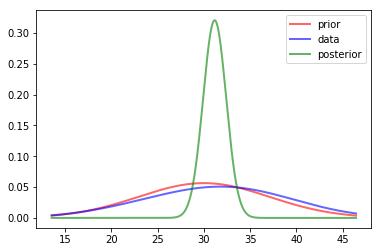

In [4]:
## The first thing we're going to do is look at how a prior and data sample are combined into a posterior distribution 
from scipy.stats import gaussian_kde 
# Let's set the prior/known parameters 
m0 = 30
v02 = 50
s2 = 32

# Let's get data from one of our samples 
samp21 = samp2[:,0]
xbar = np.mean(samp21)
n = len(samp21)
s2hat = s2/n 

# Let's get the density of the sample
sdensity = gaussian_kde(samp21) 
sdensity.set_bandwidth(bw_method=sdensity.factor / 0.5)
# Now let's form the posterior 
mpost = (s2hat * m0 + v02 *xbar)/(s2hat + v02)
v12 = s2hat*v02/(s2hat + v02)

print("Prior mean = %5.3f || Prior variance = %5.3f" % (m0,v02))
print("Data mean = %5.3f || Data mean variance = %5.3f" % (xbar,s2hat))
print("Posterior mean = %5.3f || Posterior variance = %5.3f" % (mpost,v12))



xgrid = np.arange(norm.ppf(0.01,loc=m0,scale=np.sqrt(v02)),norm.ppf(0.99,loc=m0,scale=np.sqrt(v02)),0.01)



fig, ax = plt.subplots(1,1)
ax.plot(xgrid, norm.pdf(xgrid,loc=m0,scale=np.sqrt(v02)),'r-', lw=2, alpha=0.6, label='prior')
ax.plot(xgrid, sdensity(xgrid),'b-', lw=2, alpha=0.6, label='data')
ax.plot(xgrid, norm.pdf(xgrid,loc=mpost,scale=np.sqrt(v12)),'g-', lw=2, alpha=0.6, label='posterior')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels)


### "Bayesian" Hypothesis Testing

A straightforward decision rule that Maia can use to decide whether to look for a new job or not is to quit if the posterior mean is greater than 30.   

Maia can check how often she expects her decision criterion to be correct/incorrect by sampling from the posterior distribution of the parameter



In [5]:
# Let's estimate Maia's expected probability of making the correct decision (quitting)
ndraws = 100000
postsamp = norm.rvs(loc=mpost,scale=np.sqrt(v12),size=(ndraws))
ngt30 = len(postsamp[postsamp>=30])
pctcorrect = ngt30/ndraws 
print("Maia's predicted probability that quitting is the right move = %5.3f" % pctcorrect)

# Let's do the same thing now with a diffuse prior 
v02diffuse = 10000
mpost2 = (s2hat * m0 + v02diffuse *xbar)/(s2hat + v02diffuse)
vpost2 = s2hat*v02diffuse/(s2hat + v02diffuse)
postsamp2 = norm.rvs(loc=mpost2,scale=np.sqrt(vpost2),size=(ndraws))
ngt30 = len(postsamp2[postsamp2>=30])
pctcorrect = ngt30/ndraws 
print("Maia's predicted probability that quitting is the right move under diffuse prior = %5.3f" % pctcorrect)


Maia's predicted probability that quitting is the right move = 0.825
Maia's predicted probability that quitting is the right move under diffuse prior = 0.830


### Working with Posterior Predictives

* In her previous work with hypothesis testing, Maia was able to estimate the distribution of her (sample) mean commute time under the assumption that a fixed null hypothesis was correct.  

* Bayesian inference allows her to conduct a similar exercise - estimating the distribution of her (sample) mean commute time under the assumption that model parameters follow a particular distribution

* Under Maia's current model with prior, $\mu \sim N(m_0,v_0^2)$, the posterior predictive distribution of the mean of a sample of size $n$ is equal to 

$$ \tilde{\bar{x}} \sim N\left(\frac{\hat{\sigma}^2 m_0 + v_0^2 \bar{x}}{\hat{\sigma}^2  + v_0^2}, \frac{\hat{\sigma}^2 v_0^2}{\hat{\sigma}^2 +v_0^2} + \hat{\sigma}^2 \right)$$

The Bayesian approach factors uncertainty in the null hypothesis.  If $v_0=0$, confidence intervals about sample statistics generated by posterior predictive sampling align with the confidence intervals, critical values, etc. generated from an analogous null hypothesis in a hypothesis test.  

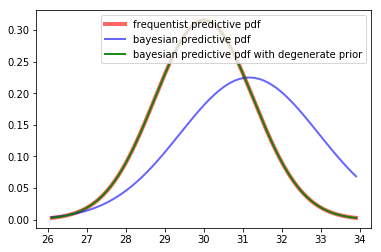

In [6]:
# Let's plot the implied distribution of the sample statistic under frequentist and bayesian approaches 

## Case 1: Hypothesis testing with null hypothesis mu=30 and sigma2=32
munull=30
s2null = 32
n=20

# Under null with both mu and sigma2 defined, frequentist sample mean is normally distributed with mean mu and variance sigma2/n
xgrid = np.arange(norm.ppf(0.001,loc=munull,scale=np.sqrt(s2null/n)),norm.ppf(0.999,loc=munull,scale=np.sqrt(s2null/n)),0.01)
fig, ax = plt.subplots(1,1)
ax.plot(xgrid, norm.pdf(xgrid, loc=munull,scale=np.sqrt(s2null/n)),'r-', lw=4, alpha=0.6, label='frequentist predictive pdf')


# Case 2: Prior is that true parameter is Gaussian with mu=30, v02=50
s2hat = s2null/n
v02 = 50 
samp21 = samp2[:,0]
mppost = (s2hat*munull  + v02*np.mean(samp21))/(s2hat + v02)
v2post = s2hat*v02/(s2hat + v02) + s2hat 
ax.plot(xgrid, norm.pdf(xgrid, loc=mppost,scale=np.sqrt(v2post)),'b-', lw=2, alpha=0.6, label='bayesian predictive pdf')

# Case 3: v02 = 0 
s2hat = s2null/n
v02 = 0 
samp21 = samp2[:,0]
mppost = (s2hat*munull  + v02*np.mean(samp21))/(s2hat + v02)
v2post = s2hat*v02/(s2hat + v02) + s2hat 
ax.plot(xgrid, norm.pdf(xgrid, loc=mppost,scale=np.sqrt(v2post)),'g-', lw=2, alpha=0.9, label='bayesian predictive pdf with degenerate prior')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels)


## Underlying Assumptions

The relatively easy coding above was made possible largely because all of the uncertainty in the model was assumed to be Gaussian.  While Bayesian Inference can be made to work with almost any distribution (subject to certain regularity conditions like having finite moments) working with other families of distributions presents challenges

As we saw above, inaccurate priors can cause problems in small samples but vanish asymptotically under suitable (CLT) conditions

## Extensions

* Posterior predictive distributions can be used to forecast or simulate additional data 
* Yesterday's posterior can be today's prior in order to smoothly incorporate new information into a model 
* Non-conjugate distributions can be utilized with Markov Chain Monte Carlo (MCMC) methods (pymc3 module) 


<a id="proof1"></a> 
#### Proof 1

Let $e_i = x_i - \bar{x}$.  Under our model, we can substitute for $x_i$ and $\bar{x}$, which yields 

$e_i = (\mu + \varepsilon_i) -(\mu + \frac{1}{n} \sum_{j=1}^n \varepsilon_j) = \frac{n-1}{n} \varepsilon_i + \frac{1}{n} \sum_{j\neq i} \varepsilon_j$

Squaring this gives

$e_i^2 = \frac{1}{n^2}((n-1)\varepsilon_i + \sum_{j\neq i} \varepsilon_j)^2 = \left(\frac{n-1}{n} \right)^2 \varepsilon_i^2 + \frac{1}{n^2} \sum_{j\neq i} \varepsilon_j^2 + \text{other terms involving interactions between $\varepsilon_j\varepsilon_k, j \neq k$}$  

Hence,


$s^2 = \frac{1}{n-1} \sum_{i=1}^n e_i^2$

$ = \frac{1}{n-1} \sum_{i=1}^n \left(\frac{(n-1)^2}{n^2} + \frac{n-1}{n^2} \varepsilon_i^2\right)  + \text{interaction terms}$ 

$= \frac{1}{n-1} \sum_{i=1}^n \frac{n-1}{n^2}(n-1+1)\varepsilon_i^2 + \text{interaction terms}$

$= \frac{1}{n} \sum_{i=1}^n \varepsilon_i^2 + \text{interaction terms}$    

Under our model $\varepsilon_i \overset{i.i.d.}{\sim}N(0,\sigma^2)$, so the expected value of the expression above is exactly equal to $\sigma^2$.  

<a id="proof2"></a>
##### Proofs 2 and 3 
Proofs 2 and 3 are standard in statistics textbooks